In [1]:
# Задание 1

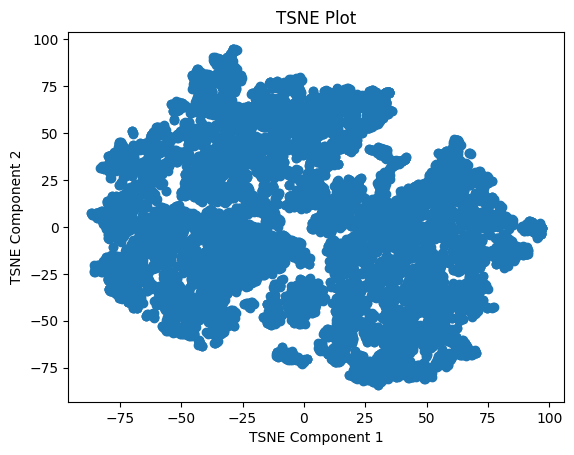

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=43)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("TSNE Plot")
plt.show()

In [3]:
# Задание 2

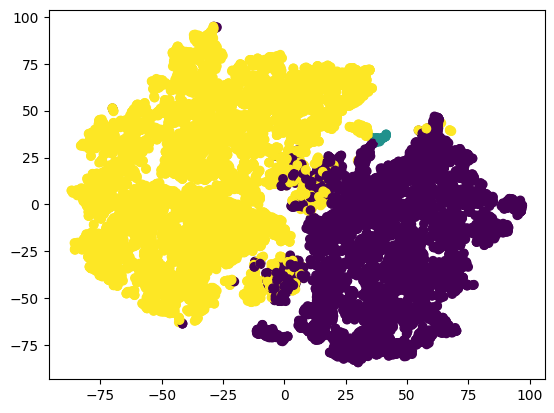

Средние значения price:
Кластер 0: 1.971472955494743
Кластер 1: 1.6630963461538464
Кластер 2: 2.1403498970263737
Средние значения CRIM:
Кластер 0: 1283.697393057756
Кластер 1: 278.0769230769231
Кластер 2: 1536.7442471367028


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=43, n_init=10)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'Population'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'Population'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'Population'].mean()))

In [ ]:
# Задание 3

In [5]:
labels_test = kmeans.predict(X_test_scaled)

print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

print('Средние значения CRIM:')

print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'Population'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'Population'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'Population'].mean()))

Средние значения price:
Кластер 0: 1.9838988235294117
Кластер 1: 1.4915714285714288
Кластер 2: 2.135388391608392
Средние значения CRIM:
Кластер 0: 1278.0112893642306
Кластер 1: 253.5
Кластер 2: 1528.1908679555738
